In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


616

In [6]:
# Import requests
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d21a93a95b364b792ac8db63ea5cb91


In [8]:
# Create an empty list to hold the weather data.
city_data = list()
# Print the beginning of the logging 
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list 
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set the numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khairagarh
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | ceres
Processing Record 6 of Set 1 | alyangula
Processing Record 7 of Set 1 | maragogi
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | vaxjo
Processing Record 12 of Set 1 | sao filipe
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | tibiao
Processing Record 16 of Set 1 | tarudant
City not found. Skipping...
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | san quintin
Processing Record 19 of Set 1 | norman wells
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | t

Processing Record 39 of Set 4 | tome-acu
City not found. Skipping...
Processing Record 40 of Set 4 | hit
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | kapaa
Processing Record 43 of Set 4 | toliary
City not found. Skipping...
Processing Record 44 of Set 4 | taveta
Processing Record 45 of Set 4 | fuerte olimpo
Processing Record 46 of Set 4 | nador
Processing Record 47 of Set 4 | aberystwyth
Processing Record 48 of Set 4 | pangnirtung
Processing Record 49 of Set 4 | monte alegre
Processing Record 50 of Set 4 | makakilo city
Processing Record 1 of Set 5 | lompoc
Processing Record 2 of Set 5 | amderma
City not found. Skipping...
Processing Record 3 of Set 5 | torbay
Processing Record 4 of Set 5 | angra
City not found. Skipping...
Processing Record 5 of Set 5 | constantine
Processing Record 6 of Set 5 | bengkulu
Processing Record 7 of Set 5 | barao de melgaco
Processing Record 8 of Set 5 | pimentel
Processing Record 9 of Set 5 | bukachacha
Processing Record 1

Processing Record 27 of Set 8 | san patricio
Processing Record 28 of Set 8 | kalmunai
Processing Record 29 of Set 8 | somerset
Processing Record 30 of Set 8 | richards bay
Processing Record 31 of Set 8 | sosnovka
Processing Record 32 of Set 8 | loa janan
Processing Record 33 of Set 8 | oktyabrskiy
Processing Record 34 of Set 8 | mahon
Processing Record 35 of Set 8 | batticaloa
Processing Record 36 of Set 8 | chatra
Processing Record 37 of Set 8 | huilong
Processing Record 38 of Set 8 | saldanha
Processing Record 39 of Set 8 | dandong
Processing Record 40 of Set 8 | kijang
Processing Record 41 of Set 8 | qunduz
Processing Record 42 of Set 8 | rocha
Processing Record 43 of Set 8 | mount isa
Processing Record 44 of Set 8 | la pintada
Processing Record 45 of Set 8 | ballina
Processing Record 46 of Set 8 | carthage
Processing Record 47 of Set 8 | aklavik
Processing Record 48 of Set 8 | mahajanga
Processing Record 49 of Set 8 | yerbogachen
Processing Record 50 of Set 8 | villarrica
Processin

Processing Record 16 of Set 12 | muhororo
Processing Record 17 of Set 12 | oistins
Processing Record 18 of Set 12 | mineral wells
Processing Record 19 of Set 12 | surt
Processing Record 20 of Set 12 | sobradinho
Processing Record 21 of Set 12 | belaya gora
Processing Record 22 of Set 12 | imeni poliny osipenko
Processing Record 23 of Set 12 | kaihua
Processing Record 24 of Set 12 | swift current
Processing Record 25 of Set 12 | bonthe
Processing Record 26 of Set 12 | zhangye
Processing Record 27 of Set 12 | abnub
Processing Record 28 of Set 12 | ningan
City not found. Skipping...
Processing Record 29 of Set 12 | ilo
Processing Record 30 of Set 12 | zaraza
Processing Record 31 of Set 12 | luderitz
Processing Record 32 of Set 12 | borogontsy
Processing Record 33 of Set 12 | balimo
City not found. Skipping...
Processing Record 34 of Set 12 | itanagar
Processing Record 35 of Set 12 | visnes
Processing Record 36 of Set 12 | soure
Processing Record 37 of Set 12 | yabrud
Processing Record 38 

In [9]:
len(city_data)

568

In [10]:
city_data

[{'City': 'Khairagarh',
  'Lat': 26.95,
  'Lng': 77.82,
  'Max Temp': 68.95,
  'Humidity': 24,
  'Cloudiness': 0,
  'Wind Speed': 5.91,
  'Country': 'IN',
  'Date': '2020-10-30 20:02:38'},
 {'City': 'Bredasdorp',
  'Lat': -34.53,
  'Lng': 20.04,
  'Max Temp': 50,
  'Humidity': 71,
  'Cloudiness': 0,
  'Wind Speed': 4.7,
  'Country': 'ZA',
  'Date': '2020-10-30 20:02:38'},
 {'City': 'Vaini',
  'Lat': -21.2,
  'Lng': -175.2,
  'Max Temp': 71.6,
  'Humidity': 83,
  'Cloudiness': 75,
  'Wind Speed': 11.41,
  'Country': 'TO',
  'Date': '2020-10-30 20:00:31'},
 {'City': 'Punta Arenas',
  'Lat': -53.15,
  'Lng': -70.92,
  'Max Temp': 55.4,
  'Humidity': 62,
  'Cloudiness': 75,
  'Wind Speed': 28.86,
  'Country': 'CL',
  'Date': '2020-10-30 20:02:38'},
 {'City': 'Ceres',
  'Lat': 37.59,
  'Lng': -120.96,
  'Max Temp': 73,
  'Humidity': 32,
  'Cloudiness': 1,
  'Wind Speed': 5.82,
  'Country': 'US',
  'Date': '2020-10-30 19:58:23'},
 {'City': 'Alyangula',
  'Lat': -13.85,
  'Lng': 136.42,
  'Ma

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khairagarh,26.95,77.82,68.95,24,0,5.91,IN,2020-10-30 20:02:38
1,Bredasdorp,-34.53,20.04,50.00,71,0,4.70,ZA,2020-10-30 20:02:38
2,Vaini,-21.20,-175.20,71.60,83,75,11.41,TO,2020-10-30 20:00:31
3,Punta Arenas,-53.15,-70.92,55.40,62,75,28.86,CL,2020-10-30 20:02:38
4,Ceres,37.59,-120.96,73.00,32,1,5.82,US,2020-10-30 19:58:23
5,Alyangula,-13.85,136.42,60.80,93,75,5.17,AU,2020-10-30 20:02:38
6,Maragogi,-9.01,-35.22,78.51,82,100,9.13,BR,2020-10-30 20:01:29
7,Ponta Do Sol,32.67,-17.10,69.80,77,20,16.11,PT,2020-10-30 19:57:44
8,Vaxjo,56.88,14.81,42.80,100,11,4.70,SE,2020-10-30 20:02:38
9,Sao Filipe,14.90,-24.50,82.17,58,66,15.52,CV,2020-10-30 20:01:03


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khairagarh,IN,2020-10-30 20:02:38,26.95,77.82,68.95,24,0,5.91
1,Bredasdorp,ZA,2020-10-30 20:02:38,-34.53,20.04,50.00,71,0,4.70
2,Vaini,TO,2020-10-30 20:00:31,-21.20,-175.20,71.60,83,75,11.41
3,Punta Arenas,CL,2020-10-30 20:02:38,-53.15,-70.92,55.40,62,75,28.86
4,Ceres,US,2020-10-30 19:58:23,37.59,-120.96,73.00,32,1,5.82


In [15]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

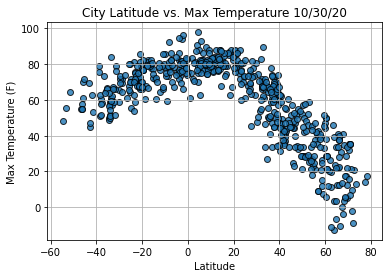

In [17]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

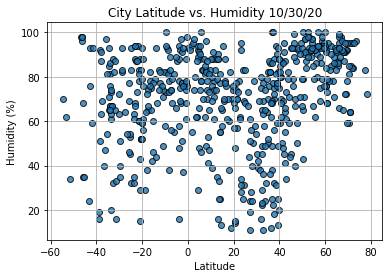

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

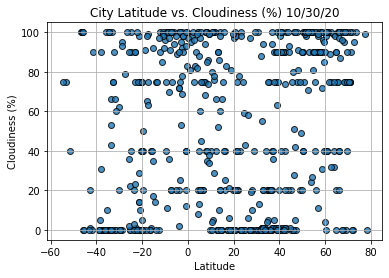

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

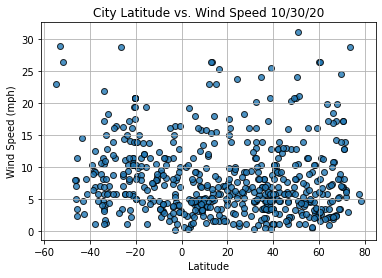

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()